In [ ]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, cheb1ord, cheby1, lfilter, freqz

In [ ]:
FILE_NAME = "ship-engine.mp3" # ship engine
audio, Fs = sf.read(FILE_NAME) # 24Hz, stereo
audio = np.mean(audio, axis=1) # mono
audio = audio[(Fs * 30):(Fs * 35)] # 30-35s sample

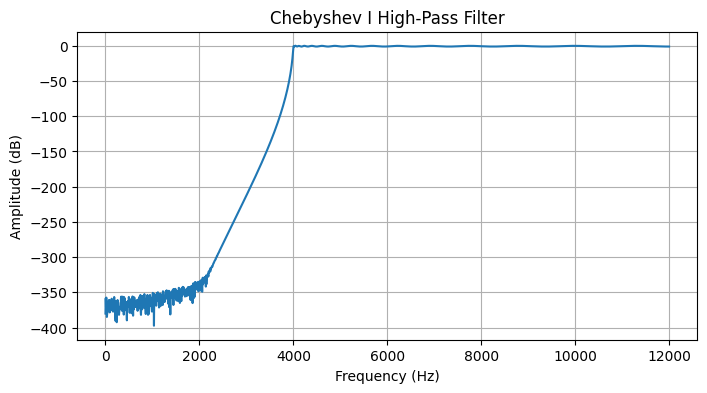

In [ ]:
# nyquist frequency, max frequency resolution
nyq = Fs / 2.0

# passband edge (Hz)
fp = 4000.0
# stopband edge (Hz)
fsb = 3800.0
# max ripple (dB)
rp = 1
# stopband attentuation (dB)
rs = 80

# Normalize frequencies based on nyquist frequency
wp = fp / nyq
ws = fsb / nyq

# Compute order
N, Wn = cheb1ord(wp, ws, rp, rs)

# Design Chebyshev Type I high-pass filter
b, a = cheby1(N, rp, Wn, btype='high')

# Frequency response
w, h = freqz(b, a, worN=2000)
plt.figure(figsize=(8, 4))
plt.plot((w / np.pi) * nyq, 20 * np.log10(abs(h)))
plt.title("Chebyshev I High-Pass Filter")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.grid()
plt.show()

In [ ]:
# apply high-pass filter
hp_audio = lfilter(b, a, audio)

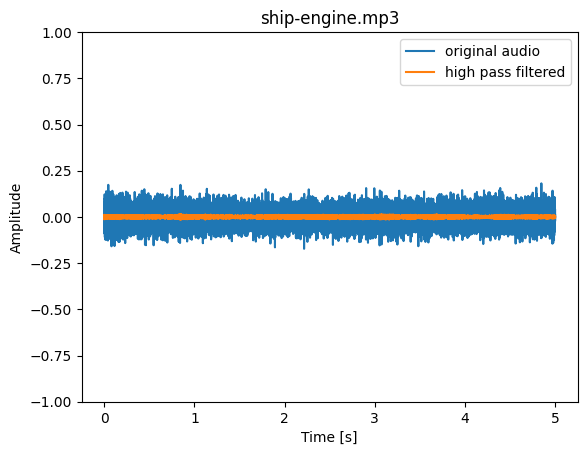

In [ ]:
plt.plot(audio, label="original audio")
plt.plot(hp_audio, label="high pass filtered")
plt.xticks([i*Fs for i in range(6) if i % 1 == 0], [str(j) for j in range(6) if j % 1 == 0])
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("ship-engine.mp3")
plt.ylim([-1, 1])
plt.legend()
plt.show()

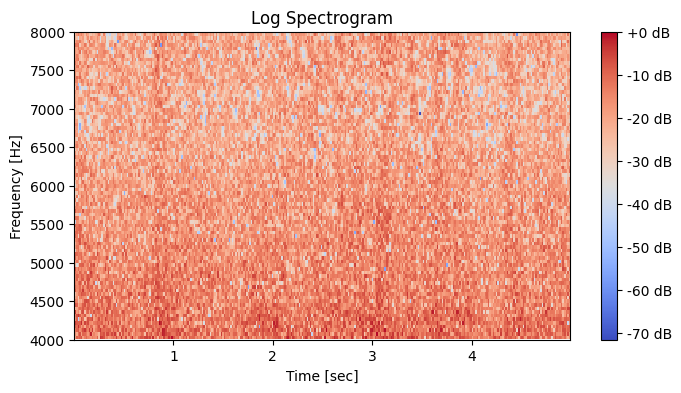

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
# generate power density spectrograms with 50% overlap for each audio channel
f, t, Sxx = spectrogram(hp_audio, fs=Fs, nfft=512, nperseg=512, noverlap=128, detrend=None, scaling='density', mode='psd')

# filter frequency range before dB normalization
h = Sxx[(f >= 4000) & (f <= 8000), :]

# convert to log spectrograms and decibels
log_Sxx = 10 * np.log10(abs(h) / np.max(abs(h))) # normalized to 0 dB

# plot log spectrograms
im_ch1 = ax.pcolormesh(t, f[(f >= 4000) & (f <= 8000)], log_Sxx, cmap='coolwarm')
fig.colorbar(im_ch1, orientation='vertical', format="%+2.f dB")
ax.set_title("Log Spectrogram")
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [sec]')
ax.set_ylim([4000, 8000])
plt.show()


(85, 312)


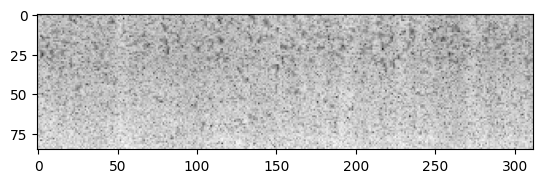

In [ ]:
# as image
plt.imshow(np.flipud(log_Sxx), cmap='gray')
print(log_Sxx.shape)